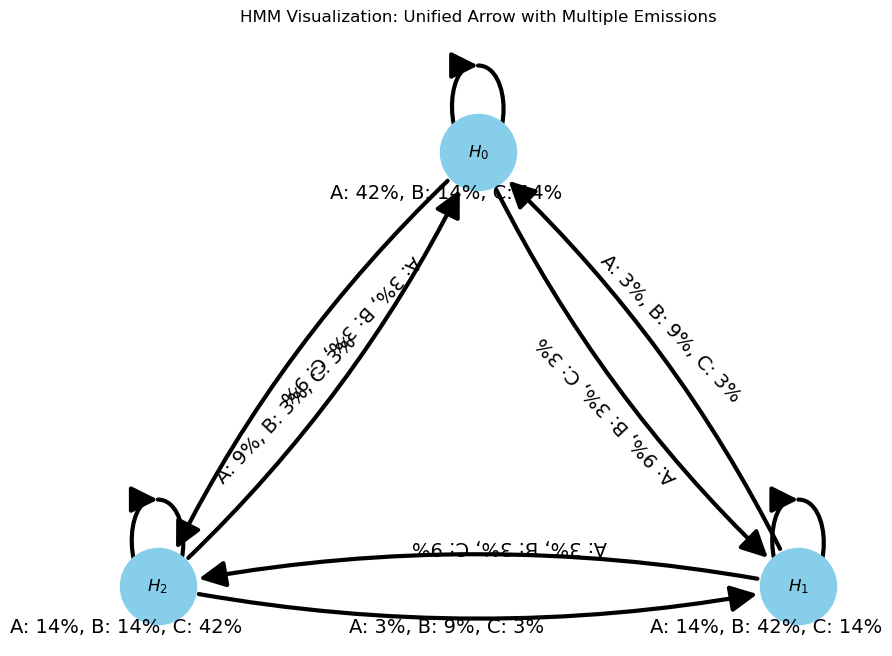

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
# Adjust the positions to make the states closer together
pos = {"$H_0$": np.array([0, 0.5]), "$H_1$": np.array([np.sqrt(2)/2, -0.25]), "$H_2$": np.array([-np.sqrt(2)/2, -0.25])}
# Recreate the graph
G = nx.MultiDiGraph()
G.add_nodes_from(["$H_0$", "$H_1$", "$H_2$"])
# Constants for HMM
x = 0.15
a = 0.6

b = (1 - a) / 2
y = 1 - 2 * x

# Calculating values for the transition tensor
ay = a * y
bx = b * x
by = b * y
ax = a * x

# Transition tensor
T = np.array([
    [[ay, bx, bx], [ax, by, bx], [ax, bx, by]],
    [[by, ax, bx], [bx, ay, bx], [bx, ax, by]],
    [[by, bx, ax], [bx, by, ax], [bx, bx, ay]]
])

plt.figure(figsize=(10, 8))  # Adjust figure size to accommodate closer states

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=3000)  # Increased node size to make the state circles larger
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')  # Adjust font size if needed

# Draw one arrow for each i,j pair and label with all emissions and probabilities, making arrows thicker and heads bigger
emissions = ["A", "B", "C"]
for i, from_state in enumerate(["$H_0$", "$H_1$", "$H_2$"]):  # From state
    for j, to_state in enumerate(["$H_0$", "$H_1$", "$H_2$"]):  # To state
        # Construct the label with emission and probabilities in a row
        label = ", ".join([f"{emissions[k]}: {T[k,i,j]*100:.0f}%" for k in range(3)])
        # Adjusting the arrow thickness and head size
        edge_style = {'width': 3, 'edge_color': 'black', 'arrows': True, 'arrowstyle': '-|>', 'arrowsize': 40, 'connectionstyle': 'arc3,rad=0.1', 'min_source_margin': 30, 'min_target_margin': 30}
        if from_state == to_state:  # Self arrow adjustments
            edge_style.update({'connectionstyle': 'arc3,rad=0.5'})  # Make self-loops more circular
        edge = nx.draw_networkx_edges(G, pos, edgelist=[(from_state, to_state)], **edge_style)  # Increased width for thicker arrows, Increased arrowsize for bigger heads
        # Calculate mid-point for label placement
        edge_midpoint = np.mean([pos[from_state], pos[to_state]], axis=0)
        # Calculate rotation angle for the text, adjusting for correct orientation
        dy = pos[to_state][1] - pos[from_state][1]
        dx = pos[to_state][0] - pos[from_state][0]
        angle = np.degrees(np.arctan2(dy, dx))
        if angle < 0:
            angle += 360  # Adjust angle to ensure text orientation is always readable
        # Offset the label position to avoid overlap
        offset = 0.07 if i < j else -0.07  # Adjust offset direction based on state order, reduced for closer states
        plt.text(edge_midpoint[0] + offset, edge_midpoint[1] + offset, label, rotation=angle, horizontalalignment='center', 
                 verticalalignment='center', fontdict={'size': 14}, )  # Adjusted box padding for closer states and increased label text size
plt.title('HMM Visualization: Unified Arrow with Multiple Emissions')
plt.axis('off')

plt.rcParams['pdf.fonttype'] = 42  # This makes text stored as text in PDF files, not paths, making it editable
plt.savefig('hmm.pdf', format='pdf')  # Save the figure as an editable PDF file


In [3]:
from epsilon_transformers.comp_mech.processes import (
    random_random_xor,
    zero_one_random,
    mess3,
)
process = zero_one_random()


In [4]:
from epsilon_transformers.comp_mech import (
    generate_sequences,
    mixed_state_tree,
    block_entropy,
    myopic_entropy,
)

In [7]:
seq = generate_sequences(process, 1, 100)
# make seq a string but have 0->A, 1->B, 2->C
seq = seq[0].tolist()
seq = [str(x) for x in seq]
seq = ''.join(seq)
# convert from numbers to letters
seq = seq.replace('0', 'X')
seq = seq.replace('1', 'Y')
seq = seq.replace('2', 'Z')




In [8]:
seq

'XXYYXYYXYYXYYXYXXYXXYXXYXXYXXYYXYYXYXXYXXYXXYXXYYXYYXYXXYYXYXXYXXYYXYYXYYXYYXYXXYXXYYXYYXYXXYXXYYXYY'